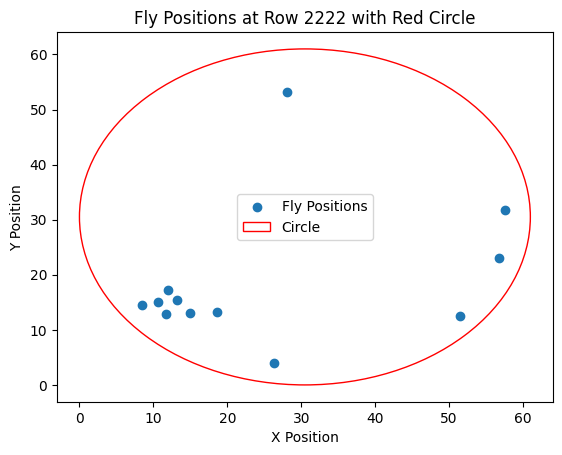

In [24]:
import pandas as pd 
import numpy as np
import networkx as nx 
import sys
import matplotlib.pyplot as plt
from itertools import combinations
from src.utils import fileio
from matplotlib.patches import Circle

TREATMENT = "LDA_OCT_5DIZ_27_11_2023_10_10_A4"

path_fly_data = f"/home/milky/drosophila-SNA/data/processed/0_0_preproc_data/LDA_OCT_5DIZ/{TREATMENT}"
fly_dict = fileio.load_files_from_folder(path_fly_data)

df_flies_vel = pd.DataFrame()
for fly_name, fly_path in fly_dict.items():
    df = pd.read_csv(fly_path, index_col=0)
    fly_columns =df[['pos x', 'pos y']]
    fly_columns.columns = [f'{fly_name}_pos_x', f'{fly_name}_pos_y']
    df_flies_vel = pd.concat([df_flies_vel, fly_columns], axis=1)

n = 2222
row_n_data = df_flies_vel.iloc[n]

fly_x_coordinates = [row_n_data[f'{fly}_pos_x'] for fly in fly_dict.keys()]
fly_y_coordinates = [row_n_data[f'{fly}_pos_y'] for fly in fly_dict.keys()]

plt.scatter(fly_x_coordinates, fly_y_coordinates, marker='o', label='Fly Positions')
# Plot the red circle with center (30.5, 30.5) and diameter
circle_center = (30.5, 30.5)
circle_diameter = 61  # Adjust the diameter as needed
circle_radius = circle_diameter / 2
circle = Circle(circle_center, circle_radius, color='red', fill=False, label='Circle')
plt.gca().add_patch(circle)

# Set plot title and labels
plt.title(f'Fly Positions at Row {n} with Red Circle')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.legend()
plt.show()

In [18]:
from scipy.spatial.distance import pdist, squareform
x_coordinates = df_flies_vel[[f'{fly}_pos_x' for fly in fly_dict.keys()]].values
y_coordinates = df_flies_vel[[f'{fly}_pos_y' for fly in fly_dict.keys()]].values

# Combine x and y coordinates into a single array
all_coordinates = np.column_stack((x_coordinates, y_coordinates))

# Calculate pairwise Euclidean distances between flies
distances = pdist(all_coordinates, metric='euclidean')

# Convert the distances to a square matrix
distances_matrix = squareform(distances)

TypeError: object of type 'numpy.float64' has no len()